In [1]:
# system
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

from config.path import get_training_data_path, get_checkpoint_path, DATASET_PATH_TYPE
from src.utils.augmentation import erase_generator
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import torch
import cv2

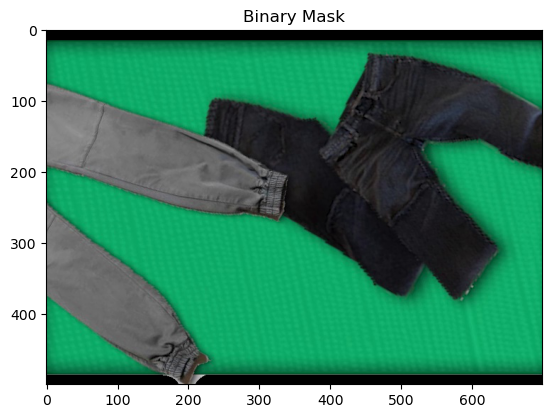

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
relative_path = get_training_data_path('production', 'band')

file_name = 'frame_304test.jpg'

fullpath = os.path.join(relative_path, file_name)
orig_image = Image.open(fullpath)
n_image = np.array(orig_image)
n_image = cv2.medianBlur(n_image, 31)

# Calculate the average color
n_cropped = n_image[0:5, 15:20]
average_color = n_cropped.mean(axis=0).mean(axis=0)


# Define a threshold range around the average color
threshold = 50  # Adjust this value as needed
lower_bound = np.clip(average_color - threshold, 0, 255)
upper_bound = np.clip(average_color + threshold, 0, 255)

# Apply the threshold to create a mask
# Apply the threshold to create a mask
mask = cv2.inRange(n_image, lower_bound, upper_bound)

# Invert the mask to create a binary mask
binary_mask = cv2.bitwise_not(mask)

n_orig_image = np.array(orig_image)

result_image = cv2.bitwise_and(n_orig_image, n_orig_image, mask=binary_mask)

# Display the binary mask using Matplotlib
plt.imshow(result_image, cmap='gray')
plt.title('Binary Mask')
plt.show()

# If you need to return the binary mask, you can return it as a numpy array
binary_mask